# 운동, 다이어트, 에너지섭취량 등 간의 관계 분석을 통한 예측모델

## 202055107 김덕용

-------------

### I. 다이어트여부 예측모델

### II. 고강도 운동일수 예측 모델

키, 몸무게, BMI, 성별, 나이 + 에너지 섭취량, 중,고강도 운동일수(일주엘에 몇번?), 다이어트(식단조절, 식이요법)여부 등

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
# 소수점 3자리까지 표시
%precision 3
df10 = pd.read_csv('hn10_all.csv', encoding = 'cp949', low_memory=False)
df11 = pd.read_csv('hn11_all.csv', encoding = 'cp949', low_memory=False)
df12 = pd.read_csv('hn12_all.csv', encoding = 'cp949', low_memory=False)
df13 = pd.read_csv('hn13_all.csv', encoding = 'cp949', low_memory=False)
df14 = pd.read_csv('hn14_all.csv', encoding = 'cp949', low_memory=False)
df15 = pd.read_csv('hn15_all.csv', encoding = 'cp949', low_memory=False)
df16 = pd.read_csv('hn16_all.csv', encoding = 'cp949', low_memory=False)
df17 = pd.read_csv('hn17_all.csv', encoding = 'cp949', low_memory=False)
df18 = pd.read_csv('hn18_all.csv', encoding = 'cp949', low_memory=False)
df19 = pd.read_csv('hn19_all.csv', encoding = 'cp949', low_memory=False)

df = pd.concat([df10, df11, df12, df13, df14, df15, df16, df17, df18, df19])

In [2]:
# 선형모델 추정
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수
%precision %.3f
# 그래프
%matplotlib inline

In [3]:
df2 = df[['sex', 'age', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN','BE3_76', 'BE3_86','N_DIET']]

In [4]:
data = df2.rename({'sex':'성별', 'age':'나이', 'HE_ht':'키', 'HE_wt':'몸무게', 'HE_wc':'허리둘레',
             'HE_BMI':'BMI', 'N_EN':'에너지섭취량','BE3_76':'고강도신체활동일수_여가',
                   'BE3_86':'중강도신체활동일수_여가', 
                   'N_DIET':'다이어트여부'}, axis = 'columns')

age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90]

age_group_cut_data = pd.cut(data.성별, age_group)


group_names = ['미성년자', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
age_group_data = pd.cut(data.나이, age_group, labels = group_names, right = False)
data['나이대'] = age_group_data

obesity = [0, 18.5, 25, 100]
data['비만도'] = pd.cut(data.BMI, obesity, labels = ['저체중', '정상', '비만'], right = False)


In [5]:
#성별
data[['성별']] = data[['성별']].replace(1, 'M')
data[['성별']] = data[['성별']].replace(2, 'F')


#고강도 신체활동 일수(여가)
data[['고강도신체활동일수_여가']] = data[['고강도신체활동일수_여가']].replace(8, np.nan)
data[['고강도신체활동일수_여가']] = data[['고강도신체활동일수_여가']].replace(9, np.nan)

#중강도 신체활동 일수(여가)
data[['중강도신체활동일수_여가']] = data[['중강도신체활동일수_여가']].replace(8, np.nan)
data[['중강도신체활동일수_여가']] = data[['중강도신체활동일수_여가']].replace(9, np.nan)

#식이요법
data['다이어트여부'] = data['다이어트여부'].replace(1.0, 'Y')
data['다이어트여부'] = data['다이어트여부'].replace(2.0, 'N')
data['다이어트여부'] = data['다이어트여부'].replace(9.0, np.nan)

data = data.dropna()

In [6]:
#20대만
data20 = data[data.나이대 == '20대']

----------------------------------------------------------

# I. 다이어트 여부 예측모델 - 로지스틱 회귀모델

In [12]:
data['diet'] = [1 if b == 'Y' else 0 for b in data['다이어트여부']]

### 가설1. 성별, 다이어트 여부 별 에너지 섭취량: 남>여, 다이어트X>다이어트O - 예상과 일치

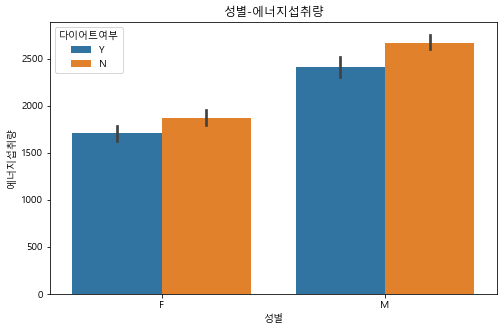

In [13]:
plt.figure(figsize=(8, 5))

plt.title('성별-에너지섭취량')
sns.barplot(x = "성별", y  = "에너지섭취량", hue = '다이어트여부', data = data)

### 가설2. 다이어트 하는 사람들이 중,고강도 신체활동 일수가 더 많을 것이다 - 대체로 일치
#### (7, 80대의 경우 다이어트라기 보단 건강을 위한 식단 조절에 가까움)

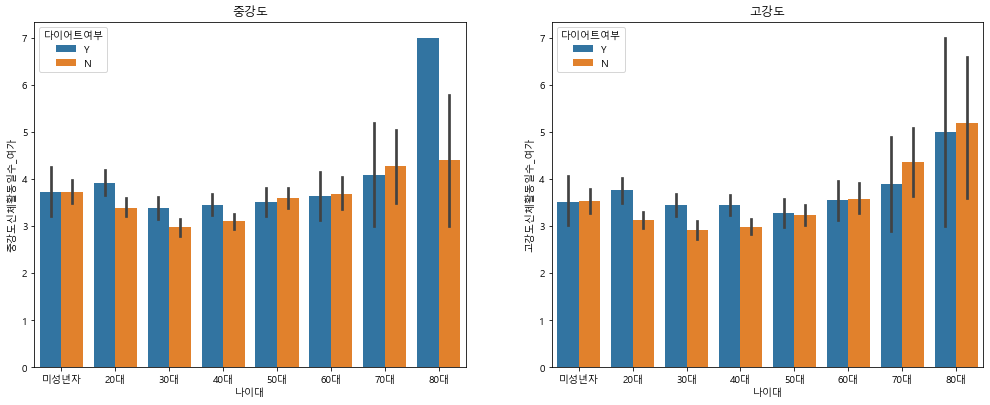

In [14]:
plt.figure(figsize=(17, 14))

plt.subplot(221)
plt.title('중강도')
sns.barplot(x = "나이대", y  = "중강도신체활동일수_여가", hue = '다이어트여부', data = data)

plt.subplot(222)
plt.title('고강도')
sns.barplot(x = "나이대", y  = "고강도신체활동일수_여가", hue = '다이어트여부', data = data)

### 가설3. 다이어트를 하는 사람들이 에너지 섭취량이 더 적을 것이다 - 예측과 일치

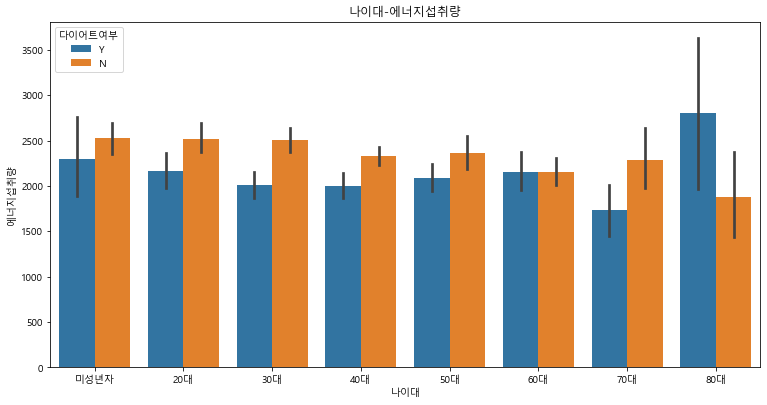

In [15]:
plt.figure(figsize=(28, 14))

plt.subplot(221)
plt.title('나이대-에너지섭취량')
sns.barplot(x = "나이대", y  = "에너지섭취량", hue = '다이어트여부', data = data)

### 가설4. 다이어트 하는 사람의  평균  BMI가 더 높을 것이다 - 대체적으로 일치

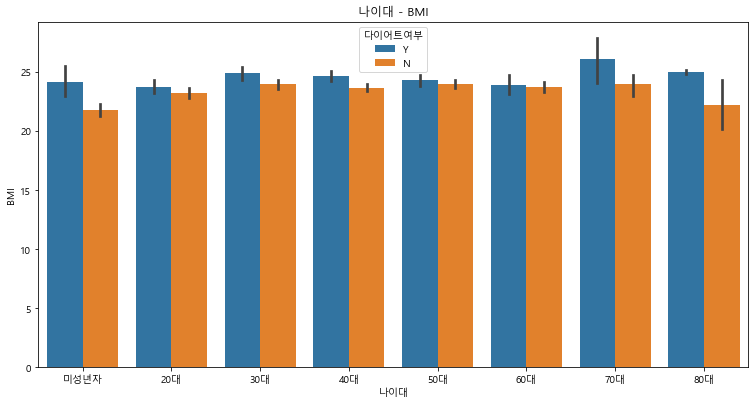

In [16]:
plt.figure(figsize=(28, 14))

plt.subplot(221)
plt.title('나이대 - BMI')
sns.barplot(x = "나이대", y  = "BMI", hue = '다이어트여부', data = data)

In [17]:
pd.crosstab(index = [data['비만도']], columns = data['다이어트여부'])

다이어트여부,N,Y
비만도,,
저체중,65,10
정상,955,443
비만,417,300


### crosstab 이용: 다이어트 하는 사람의 비율: 비만(약 75%)>정상(약 45%)>저체중(20%미만)

## 위 내용을 기반으로 로지스틱 회귀모델 작성

In [21]:
mod_diet_sex = smf.glm(formula = "diet ~ 성별", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [22]:
mod_diet_age = smf.glm(formula = "diet ~ 나이", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [23]:
mod_diet_height = smf.glm(formula = "diet ~ 키", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [24]:
mod_diet_weight = smf.glm(formula = "diet ~ 몸무게", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [25]:
mod_diet_waist = smf.glm(formula = "diet ~ 허리둘레", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [26]:
mod_diet_BMI = smf.glm(formula = "diet ~ BMI", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [27]:
mod_diet_en = smf.glm(formula = "diet ~ 에너지섭취량", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [28]:
mod_diet_hex = smf.glm(formula = "diet ~ 고강도신체활동일수_여가", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [29]:
mod_diet_lex = smf.glm(formula = "diet ~ 중강도신체활동일수_여가", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [30]:
print(mod_diet_sex.aic.round(3),
mod_diet_age.aic.round(3),
mod_diet_height.aic.round(3),
mod_diet_weight.aic.round(3),
mod_diet_waist.aic.round(3),
mod_diet_BMI.aic.round(3),
mod_diet_en.aic.round(3),
mod_diet_hex.aic.round(3),
mod_diet_lex.aic.round(3))

# en sex bmi (hex waist) height lex age

2774.885 2821.943 2810.315 2813.747 2805.913 2778.827 2774.395 2805.254 2814.394


In [31]:
mod_diet_2 = smf.glm(formula = "diet ~ 에너지섭취량 + 성별", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [32]:
mod_diet_3 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [33]:
mod_diet_4 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별 + 고강도신체활동일수_여가", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [34]:
mod_diet_5 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별 + 고강도신체활동일수_여가 + 허리둘레", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [35]:
mod_diet_6 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별 + 고강도신체활동일수_여가 + 허리둘레 + 몸무게", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [36]:
mod_diet_7 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별 + 고강도신체활동일수_여가 + 허리둘레 + 몸무게 + 키", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [37]:
mod_diet_8 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별 + 고강도신체활동일수_여가 + 허리둘레 + 몸무게 + 키 + 중강도신체활동일수_여가", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [38]:
mod_diet_9 = smf.glm(formula = "diet ~ 에너지섭취량 + BMI + 성별 + 고강도신체활동일수_여가 + 허리둘레 + 몸무게 + 키 + 중강도신체활동일수_여가 + 나이", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [39]:
print(mod_diet_en.aic.round(3),
mod_diet_2.aic.round(3),
mod_diet_3.aic.round(3),
mod_diet_4.aic.round(3),
mod_diet_5.aic.round(3),
mod_diet_6.aic.round(3),
mod_diet_7.aic.round(3),
mod_diet_8.aic.round(3),
mod_diet_9.aic.round(3))

#mod 6 = 2668.305

2774.395 2754.031 2679.801 2669.602 2670.526 2668.305 2669.617 2671.439 2673.333


In [118]:
data['predicted_diet'] = [1 if b >= 0.5 else 0 for b in mod_diet_6.predict()]

In [119]:
data[data.diet != data.predicted_diet]

,성별,나이,키,몸무게,허리둘레,BMI,에너지섭취량,고강도신체활동일수_여가,중강도신체활동일수_여가,다이어트여부,나이대,비만도,diet,predicted_diet
94,F,38,163.1,57.0,72.5,21.427275,2143.567036,5.0,5.0,Y,30대,정상,1,0
100,F,13,169.2,79.9,83.0,27.909115,1605.187456,4.0,6.0,N,미성년자,비만,0,1
146,M,19,172.4,80.6,85.5,27.118179,744.427558,4.0,4.0,Y,미성년자,비만,1,0
260,M,52,161.7,60.4,71.9,23.100262,2055.413681,3.0,4.0,Y,50대,정상,1,0
420,F,15,159.9,68.7,77.6,26.869514,1306.965735,3.0,2.0,N,미성년자,비만,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7876,M,42,176.9,87.5,102.8,27.960980,3494.647232,2.0,4.0,Y,40대,비만,1,0
7952,M,32,167.0,68.6,84.7,24.597512,1530.321377,7.0,7.0,Y,30대,정상,1,0
7957,M,24,169.8,71.0,79.1,24.625382,2475.791522,6.0,6.0,Y,20대,정상,1,0
7959,M,34,181.6,86.4,89.3,26.198839,2451.702625,3.0,4.0,Y,30대,비만,1,0


### 713명/2190명,  약 67.4% 예측률
#### 낮다고 판단, summary()를 통해 살펴보니 p>0.05인 값 존재. 이들을 뺀 새 모델 구성

In [121]:
mod_diet_6.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.1108,0.470,-6.613,0.000,-4.033,-2.189
성별[T.M],-0.9610,0.147,-6.542,0.000,-1.249,-0.673
에너지섭취량,-0.0002,5.05e-05,-4.016,0.000,-0.000,-0.000
BMI,0.0589,0.036,1.623,0.104,-0.012,0.130
고강도신체활동일수_여가,0.1003,0.028,3.527,0.000,0.045,0.156
허리둘레,0.0047,0.012,0.406,0.684,-0.018,0.027
몸무게,0.0201,0.010,2.050,0.040,0.001,0.039


### 새 모델 구성

In [41]:
mod_diet_6_2 = smf.glm(formula = "diet ~ 에너지섭취량 + 성별 + 고강도신체활동일수_여가 + 몸무게", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [165]:
mod_diet_6_2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.5136,0.311,-8.072,0.000,-3.124,-1.903
성별[T.M],-1.0930,0.129,-8.493,0.000,-1.345,-0.841
에너지섭취량,-0.0002,5.03e-05,-4.240,0.000,-0.000,-0.000
고강도신체활동일수_여가,0.1004,0.028,3.536,0.000,0.045,0.156
몸무게,0.0392,0.005,8.469,0.000,0.030,0.048


In [49]:
data['predicted_diet'] = [1 if b >= 0.5 else 0 for b in mod_diet_6_2.predict()]

data[data.diet != data.predicted_diet]

,성별,나이,키,몸무게,허리둘레,BMI,에너지섭취량,고강도신체활동일수_여가,중강도신체활동일수_여가,다이어트여부,나이대,비만도,diet,predicted_diet
94,F,38,163.1,57.0,72.5,21.427275,2143.567036,5.0,5.0,Y,30대,정상,1,0
100,F,13,169.2,79.9,83.0,27.909115,1605.187456,4.0,6.0,N,미성년자,비만,0,1
146,M,19,172.4,80.6,85.5,27.118179,744.427558,4.0,4.0,Y,미성년자,비만,1,0
260,M,52,161.7,60.4,71.9,23.100262,2055.413681,3.0,4.0,Y,50대,정상,1,0
420,F,15,159.9,68.7,77.6,26.869514,1306.965735,3.0,2.0,N,미성년자,비만,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7952,M,32,167.0,68.6,84.7,24.597512,1530.321377,7.0,7.0,Y,30대,정상,1,0
7957,M,24,169.8,71.0,79.1,24.625382,2475.791522,6.0,6.0,Y,20대,정상,1,0
7959,M,34,181.6,86.4,89.3,26.198839,2451.702625,3.0,4.0,Y,30대,비만,1,0
8006,M,48,168.9,67.3,85.9,23.591511,2005.755044,6.0,6.0,Y,40대,정상,1,0


### 704명/2190명,  약 67.8% 예측률
#### 조금 높아지긴 했다

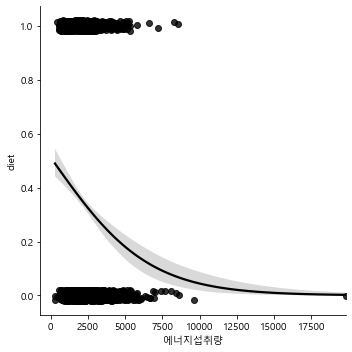

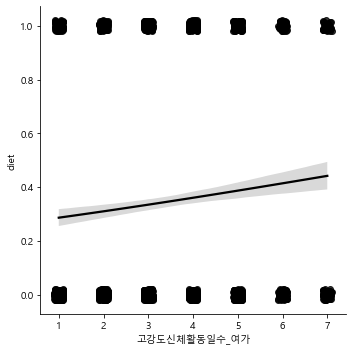

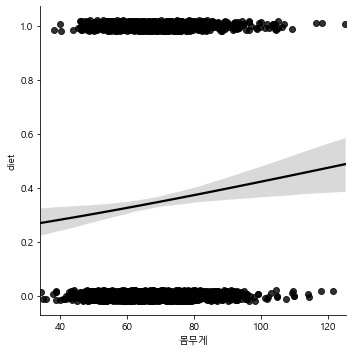

In [160]:
#에너지섭취량 + 성별 + 고강도신체활동일수_여가 + 몸무게

sns.lmplot(x = "에너지섭취량", y = "diet",
           data = data, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

sns.lmplot(x = "고강도신체활동일수_여가", y = "diet",
           data = data, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

sns.lmplot(x = "몸무게", y = "diet",
           data = data, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

음.....

In [114]:
mod_diet_6.aic.round(3), mod_diet_6_2.aic.round(3)

(2668.305, 2669.252)

#### AIC값 상으로는 원래 모델이 더 우수?

## 모델 1로 만든 예측모델: (input받아 출력, 다이어트 하고 있을 확률)

In [164]:
o = input('성별( F / M ) :  ')
p = float(input('에너지섭취량 :  '))
q = float(input('일주일 동안의 고강도 신체활동 일수(1~7) :  '))
r = float(input('몸무게 :  '))

per = mod_diet_6_2.predict(pd.DataFrame({"성별":[o], "에너지섭취량": [p], "고강도신체활동일수_여가":[q], "몸무게": [r]}))
print('다이어트를 하고있을 확률: ', per)

성별( F / M ) :  F
에너지섭취량 :  10000
일주일 동안의 고강도 신체활동 일수(1~7) :  0
몸무게 :  105
다이어트를 하고있을 확률:  0    0.369823
dtype: float64


---------

# II. 20대 고강도 운동일수 예측 모델 - 선형회귀모형

(누가 헬창일까?)

In [54]:
lm_model = smf.ols(formula = "고강도신체활동일수_여가 ~ 성별 + 몸무게 + 에너지섭취량 + 키 + BMI + 허리둘레 + 중강도신체활동일수_여가 + 다이어트여부",  data = data20).fit()

In [55]:
sm.stats.anova_lm(lm_model, typ=2).round(3)

,sum_sq,df,F,PR(>F)
성별,0.012,1.0,0.010,0.921
다이어트여부,5.543,1.0,4.591,0.033
몸무게,0.036,1.0,0.030,0.862
에너지섭취량,0.830,1.0,0.688,0.407
키,0.000,1.0,0.000,0.985
BMI,0.096,1.0,0.079,0.779
허리둘레,0.019,1.0,0.016,0.901
중강도신체활동일수_여가,551.609,1.0,456.916,0.000
Residual,498.592,413.0,NaN,NaN


Type-II ANOVA 이용, 각각의 변수가 설명하는 수정제곱합
Type-II ANOVA상으론 : 중강도 - 다이어트여부

### 성별, 다이어트여부에 따른 에너지섭취량?

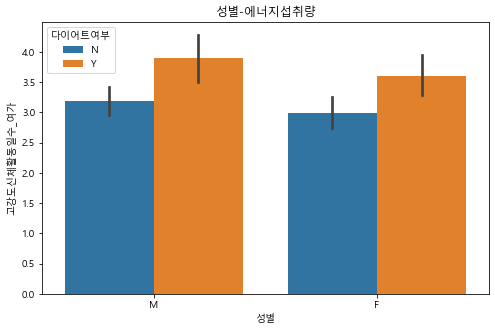

In [58]:
plt.figure(figsize=(8, 5))

plt.title('성별-에너지섭취량')
sns.barplot(x = "성별", y  = "고강도신체활동일수_여가", hue = '다이어트여부', data = data20)

In [59]:
model = smf.ols("고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부", data = data20).fit()

In [60]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6562,0.131,4.990,0.000,0.398,0.915
다이어트여부[T.Y],0.2551,0.112,2.278,0.023,0.035,0.475
중강도신체활동일수_여가,0.7279,0.033,21.846,0.000,0.662,0.793


p값들이 다 0.05보다 작다

-------------

방법2

In [63]:
lm_model_sex = smf.ols(formula = "고강도신체활동일수_여가 ~ 성별 ",  data = data20).fit()

In [64]:
lm_model_weight = smf.ols(formula = "고강도신체활동일수_여가 ~ 몸무게",  data = data20).fit()

In [65]:
lm_model_en = smf.ols(formula = "고강도신체활동일수_여가 ~ 에너지섭취량",  data = data20).fit()

In [66]:
lm_model_height = smf.ols(formula = "고강도신체활동일수_여가 ~ 키",  data = data20).fit()

In [67]:
lm_model_waist = smf.ols(formula = "고강도신체활동일수_여가 ~ 허리둘레",  data = data20).fit()

In [68]:
lm_model_lex = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가",  data = data20).fit()

In [69]:
lm_model_diet = smf.ols(formula = "고강도신체활동일수_여가 ~ 다이어트여부",  data = data20).fit()

In [70]:
print("성별 모델：", lm_model_sex.aic.round(3))
print("몸무게 모델：", lm_model_weight.aic.round(3))
print("에너지섭취량 모델：", lm_model_en.aic.round(3))
print("키 모델：", lm_model_height.aic.round(3))
print("허리둘레 모델：", lm_model_waist.aic.round(3))
print("중강도운동 모델：", lm_model_lex.aic.round(3))
print("다이어트여부 모델：", lm_model_diet.aic.round(3))

성별 모델： 1609.433
몸무게 모델： 1605.058
에너지섭취량 모델： 1609.517
키 모델： 1610.233
허리둘레 모델： 1604.266
중강도운동 모델： 1279.333
다이어트여부 모델： 1595.01


In [71]:
lm_model_2 = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부",  data = data20).fit()

In [72]:
lm_model_3 = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부 + 허리둘레",  data = data20).fit()

In [73]:
lm_model_4 = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부 + 허리둘레 + 몸무게",  data = data20).fit()

In [74]:
lm_model_5 = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부 + 허리둘레 + 몸무게 + 성별",  data = data20).fit()

In [75]:
lm_model_6 = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부 + 허리둘레 + 몸무게 + 성별 + 에너지섭취량",  data = data20).fit()

In [76]:
lm_model_7 = smf.ols(formula = "고강도신체활동일수_여가 ~ 중강도신체활동일수_여가 + 다이어트여부 + 허리둘레 + 몸무게 + 성별 + 에너지섭취량 + 키",  data = data20).fit()

In [77]:
print("중강도운동 모델：", lm_model_lex.aic.round(3))
print("모델2：", lm_model_2.aic.round(3))
print("모델3：", lm_model_3.aic.round(3))
print("모델4：", lm_model_4.aic.round(3))
print("모델5：", lm_model_5.aic.round(3))
print("모델6：", lm_model_6.aic.round(3))
print("모델7：", lm_model_7.aic.round(3))

중강도운동 모델： 1279.333
모델2： 1276.137
모델3： 1278.137
모델4： 1279.92
모델5： 1281.688
모델6： 1282.948
모델7： 1284.047


In [78]:
# 모델2가 가장 우수

In [79]:
data20['예측고강도운동'] = lm_model_2.predict()

<ipython-input-79-54f7a1b99832>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['예측고강도운동'] = lm_model_2.predict()


In [80]:
hex_days = [0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
data20['예측고강도운동'] = pd.cut(data20.예측고강도운동, hex_days, labels = [0, 1, 2, 3, 4, 5, 6, 7], right = False)

<ipython-input-80-52f8fd1daa71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['예측고강도운동'] = pd.cut(data20.예측고강도운동, hex_days, labels = [0, 1, 2, 3, 4, 5, 6, 7], right = False)


### 모델의 예측률

In [83]:
print(100-100*(185/422))

56.161137440758296


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


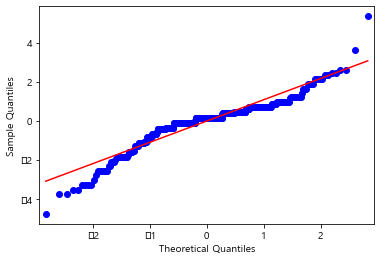

In [158]:
fig = sm.qqplot(lm_model_2.resid, line = "s")

## 모델 2로 만든 예측모델: (input받아 출력)

In [130]:
a = float(input('일주일 동안의 중강도 신체활동 일수(1~7) :  '))
b = input('다이어트여부( Y / N ) :  ')

lm_model_2.predict(pd.DataFrame({"중강도신체활동일수_여가":[a], "다이어트여부": [b]}))

일주일 동안의 중강도 신체활동 일수(1~7) :  4
다이어트여부( Y / N ) :  N


0    3.567892
dtype: float64

# 결론

1. 모델 1상에선 현재 체중이 적게나가고, 먹는 양이 적은 사람이 다이어트를 하고있을 확률이 높다

2. 모델 2상에선 평소 운동을 일상적으로 하는 사람이 헬창일 확률이 높다

3. 다이어트에 영향을 주는 것은 어떤 음식을 얼마나 먹느냐(저탄수화물 고단백)이 중요한 것이 아니라 섭취하는 총 칼로리 양이 더 중요하다